<a href="https://colab.research.google.com/github/essteer/data-science/blob/main/src/analysis/eda_vpn_connections.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

## VPN Connection Performance Data

Goal: Analyse VPN connection performance
Dataset: vpn.csv

This is a dataset of VPN connections from three different user location countries to three selected VPN locations.

## Imports and theme

In [ ]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
palette = {
    "dark": "#252b33", "grey": "#45464d",
    "light": "#fefeff", "stone": "#8f8f94",
    "blue": "#336681", "green": "#089389",
    "red": "#d34748", "pink": "#cf82d3",
    "yellow": "#e6daaa"
}
# Set plot defaults
sns.set_style(rc={"figure.facecolor": palette["dark"],
                  "axes.facecolor": palette["dark"],
                  "axes.edgecolor": palette["light"],
                  "grid.color": palette["grey"]})

In [ ]:
location_colours = {
    "DE": palette["red"],
    "Germany - Nuremberg": palette["red"],
    "FR": palette["yellow"],
    "France - Paris - 1": palette["yellow"],
    "GB": palette["blue"],
    "UK - London": palette["blue"]
}
protocol_colours = {"pptp": palette["red"],
                    "ipsec_ikev2": palette["yellow"],
                    "sstp": palette["blue"],
                    "tcp": palette["green"],
                    "udp": palette["pink"],
                    "cisco_ipsec": palette["light"],
                    "l2tp": palette["stone"]}

## Load data

In [ ]:
df = pd.read_csv("vpn.csv", sep=",")

## User country analysis

In [ ]:
def create_line_plot(ax, data, x, y, hue, xticks, colors, legend=True, title=False):

    def title_case(string):
        articles = ["a", "an", "as", "at", "in", "is", "of", "on", "the", "to"]
        output = " ".join([word.title() if word.lower() not in articles else word.lower() for word in string.split("_")])
        # Capitalize in case first word is an article
        output = output.capitalize()
        return output

    if hue is None:
        sns.lineplot(data=data, x=x, y=y, palette=colors, legend=legend)
    else:
        sns.lineplot(data=data, x=x, y=y, hue=hue, palette=colors, legend=legend)
    # Set plot title and labels
    if title:
        title = title
    else:
        title = title_case(y)
    plt.title(title, fontdict={"size": 12, "color": palette["light"]})
    xlabel = title_case(x)
    plt.xlabel(xlabel, fontsize=16, color=palette["stone"])
    ylabel = f"Mean {title_case(y)}"
    plt.ylabel(ylabel, fontsize=16, color=palette["stone"])
    plt.xticks(xticks, fontsize=12, color=palette["stone"], rotation=45)
    plt.yticks(fontsize=12, color=palette["stone"])
    # Remove ticks from x and y axes (left and bottom)
    plt.tick_params(left=False, bottom=False)
    sns.despine()
    if legend:
        plt.legend(fontsize=10, labelcolor=palette["light"], frameon=False)

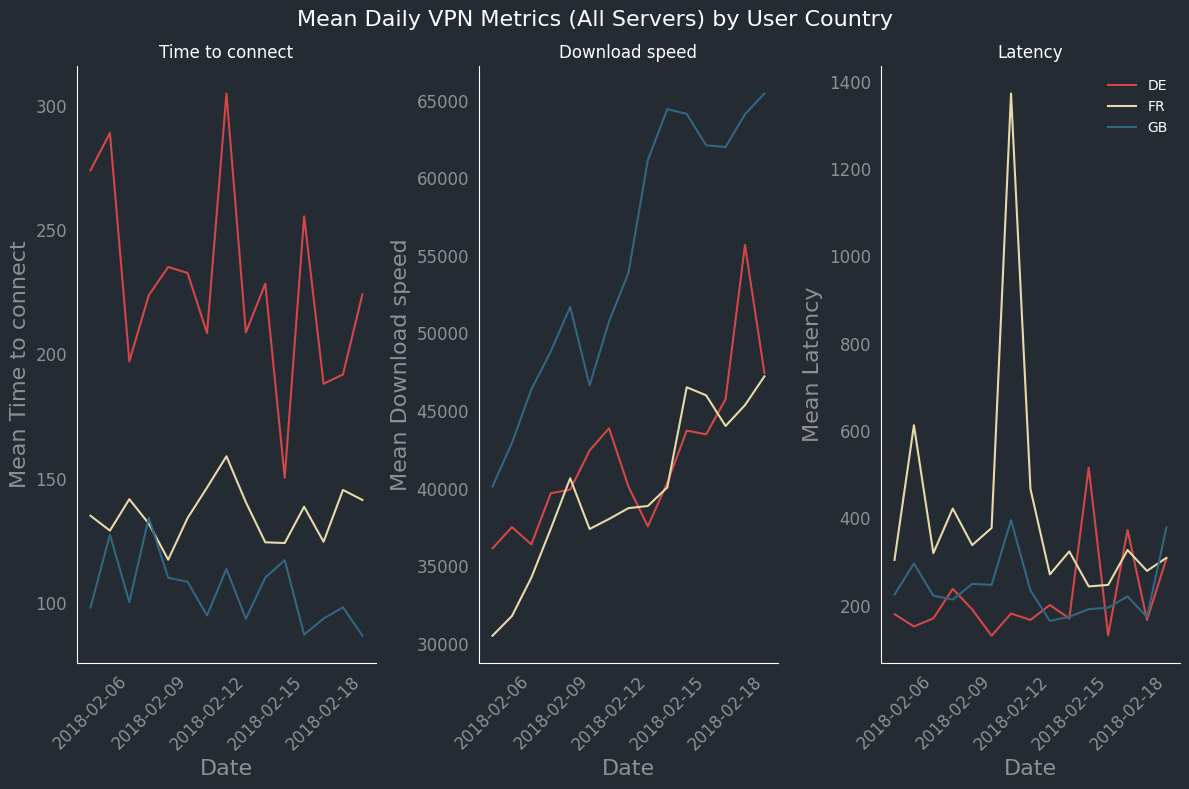

In [ ]:
# Create line plots for mean variables by user_country
plt.figure(figsize=(12, 8))
plt.suptitle("Mean Daily VPN Metrics (All Servers) by User Country", fontsize=16, color=palette["light"])

# Line plot for time_to_connect
ax1 = plt.subplot(1, 3, 1)
mean_data = df.groupby(["date", "user_country"])["time_to_connect"].mean().reset_index()
create_line_plot(ax1, mean_data, "date", "time_to_connect", "user_country", mean_data["date"].unique()[::3], location_colours, legend=False)
# Line plot for download_speed
ax2 = plt.subplot(1, 3, 2)
mean_data = df.groupby(["date", "user_country"])["download_speed"].mean().reset_index()
create_line_plot(ax2, mean_data, "date", "download_speed", "user_country", mean_data["date"].unique()[::3], location_colours, legend=False)
# Line plot for latency
ax3 = plt.subplot(1, 3, 3)
mean_data = df.groupby(["date", "user_country"])["latency"].mean().reset_index()
create_line_plot(ax3, mean_data, "date", "latency", "user_country", mean_data["date"].unique()[::3], location_colours, legend=True)

plt.tight_layout()
plt.show()

The charts above provide the mean connection times, download speeds, and latencies for users based in DE, FR, and GB, and using any of the three servers.

Users based in GB (the UK) experienced the best overall connection times and latency, and considerably faster download speeds than either DE (Germany) or FR (France). Users based in Germany experienced the slowest connection times, but DE download speeds slightly outperformed those for FR users, and latency closely approximated that in the UK.

Descriptive statistics for the three user countries are provided below; note that the minimums for all of the values were 0.0, so these have not been displayed.

In [ ]:
# Get data descriptions for DE, FR and GB
desc_de = df[df["user_country"] == "DE"].describe().T
desc_de = desc_de.loc[:, ["max", "mean", "std"]]
desc_fr = df[df["user_country"] == "FR"].describe().T
desc_fr = desc_fr.loc[:, ["max", "mean", "std"]]
desc_gb = df[df["user_country"] == "GB"].describe().T
desc_gb = desc_gb.loc[:, ["max", "mean", "std"]]
# Combine descriptions and set higher-level column headings
combined_desc = pd.concat([desc_de, desc_fr, desc_gb], keys=["DE User", "FR User", "GB User"], axis=1).round(2)
print(combined_desc)

                   DE User                        FR User                      \
                       max      mean       std        max      mean       std   
time_to_connect   21944.00    231.96   1030.30   60113.00    135.35    645.52   
download_speed   372800.32  40960.91  31534.88  341598.84  38827.01  37875.29   
latency          125829.00    210.92   1824.76  978256.00    418.52   6153.97   

                  GB User                      
                      max      mean       std  
time_to_connect   58817.0    107.22    616.18  
download_speed   336114.8  52584.82  38611.51  
latency          281076.0    238.67   2070.81  


## Server location analysis

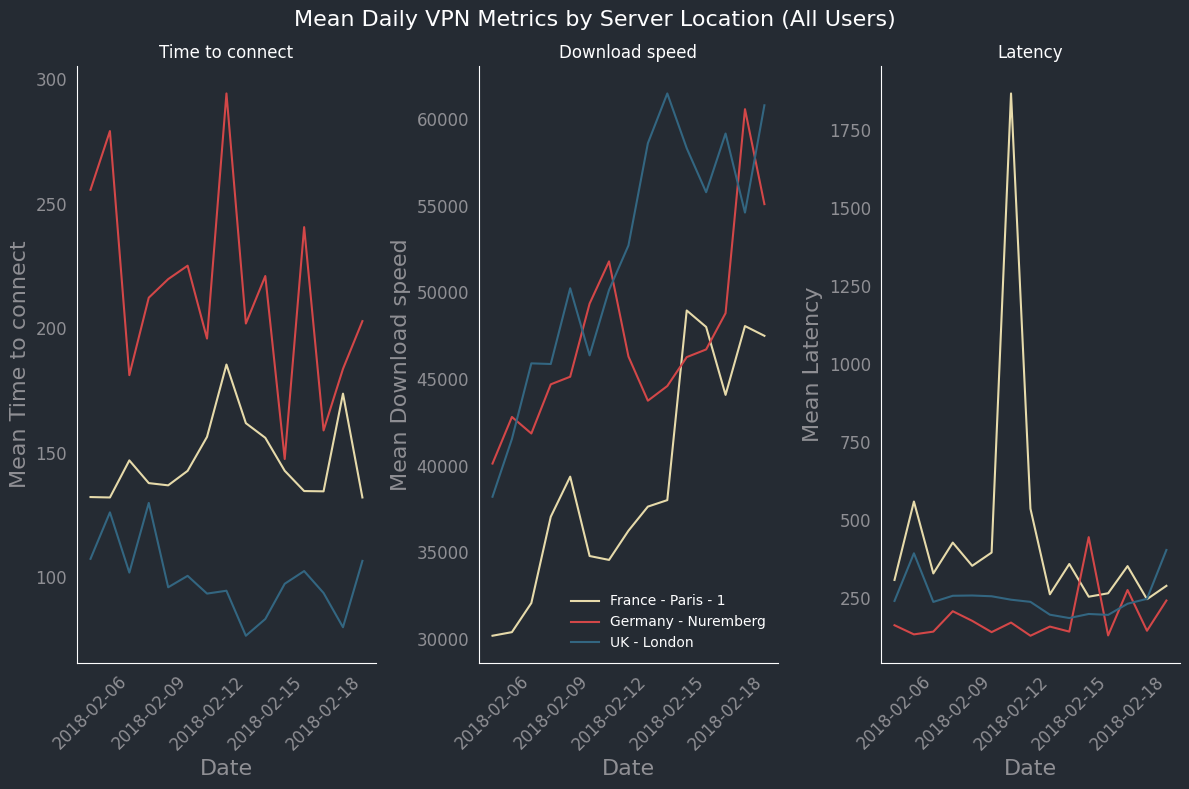

In [ ]:
# Create line plots for mean variables by location_selected
plt.figure(figsize=(12, 8))
plt.suptitle("Mean Daily VPN Metrics by Server Location (All Users)", fontsize=16, color=palette["light"])

# Line plot for time_to_connect
ax1 = plt.subplot(1, 3, 1)
mean_data = df.groupby(["date", "location_selected"])["time_to_connect"].mean().reset_index()
create_line_plot(ax1, mean_data, "date", "time_to_connect", "location_selected", mean_data["date"].unique()[::3], location_colours, legend=False)
# Line plot for download_speed
ax2 = plt.subplot(1, 3, 2)
mean_data = df.groupby(["date", "location_selected"])["download_speed"].mean().reset_index()
create_line_plot(ax2, mean_data, "date", "download_speed", "location_selected", mean_data["date"].unique()[::3], location_colours, legend=True)
# Line plot for latency
ax3 = plt.subplot(1, 3, 3)
mean_data = df.groupby(['date', 'location_selected'])['latency'].mean().reset_index()
create_line_plot(ax3, mean_data, "date", "latency", "location_selected", mean_data["date"].unique()[::3], location_colours, legend=False)

plt.tight_layout()
plt.show()

The charts above provide the mean connection times, download speeds, and latencies for users based in DE, FR, and GB, and using any of the three servers.

Users based in GB (the UK) experienced the best overall connection times and latency, and considerably faster download speeds than either DE (Germany) or FR (France). Users based in Germany experienced the slowest connection times, but their download speeds slightly outperformed those for French users, and latency closely approximated that in the UK.

The descriptive statistics displayed below reinforce the impression given by these charts. Note that the mean download speed of the Germany - Nuremberg server is not too far from the UK - London server; however, the UK - London server has a lower standard deviation than Germany's for download speed. This indicates that it is both faster and less volatile than the Germany - Nuremberg server, on average.

In [ ]:
# Get data descriptions for Germany - Nuremberg, France - Paris - 1, and UK - London
desc_nur = df[df["location_selected"] == "Germany - Nuremberg"].describe().T
desc_nur = desc_nur.loc[:, ["max", "mean", "std"]]
desc_par = df[df["location_selected"] == "France - Paris - 1"].describe().T
desc_par = desc_par.loc[:, ["max", "mean", "std"]]
desc_lon = df[df["location_selected"] == "UK - London"].describe().T
desc_lon = desc_lon.loc[:, ["max", "mean", "std"]]
# Combine descriptions and set higher-level column headings
combined_desc = pd.concat([desc_nur, desc_par, desc_lon], keys=["Germany - Nuremberg", "France - Paris - 1", "UK - London"], axis=1).round(2)
print(combined_desc)

                Germany - Nuremberg                     France - Paris - 1  \
                                max      mean       std                max   
time_to_connect            21944.00    219.29   1002.57           60113.00   
download_speed            372800.32  46172.08  42424.88          275138.25   
latency                   125829.00    182.78   1693.16          978256.00   

                                    UK - London                      
                     mean       std         max      mean       std  
time_to_connect    146.46    674.30     58817.0    101.40    592.33  
download_speed   37906.94  34606.01    336114.8  50248.62  38646.02  
latency            450.12   6957.34    191544.0    251.83   1375.57  


## User country vs location selected analysis

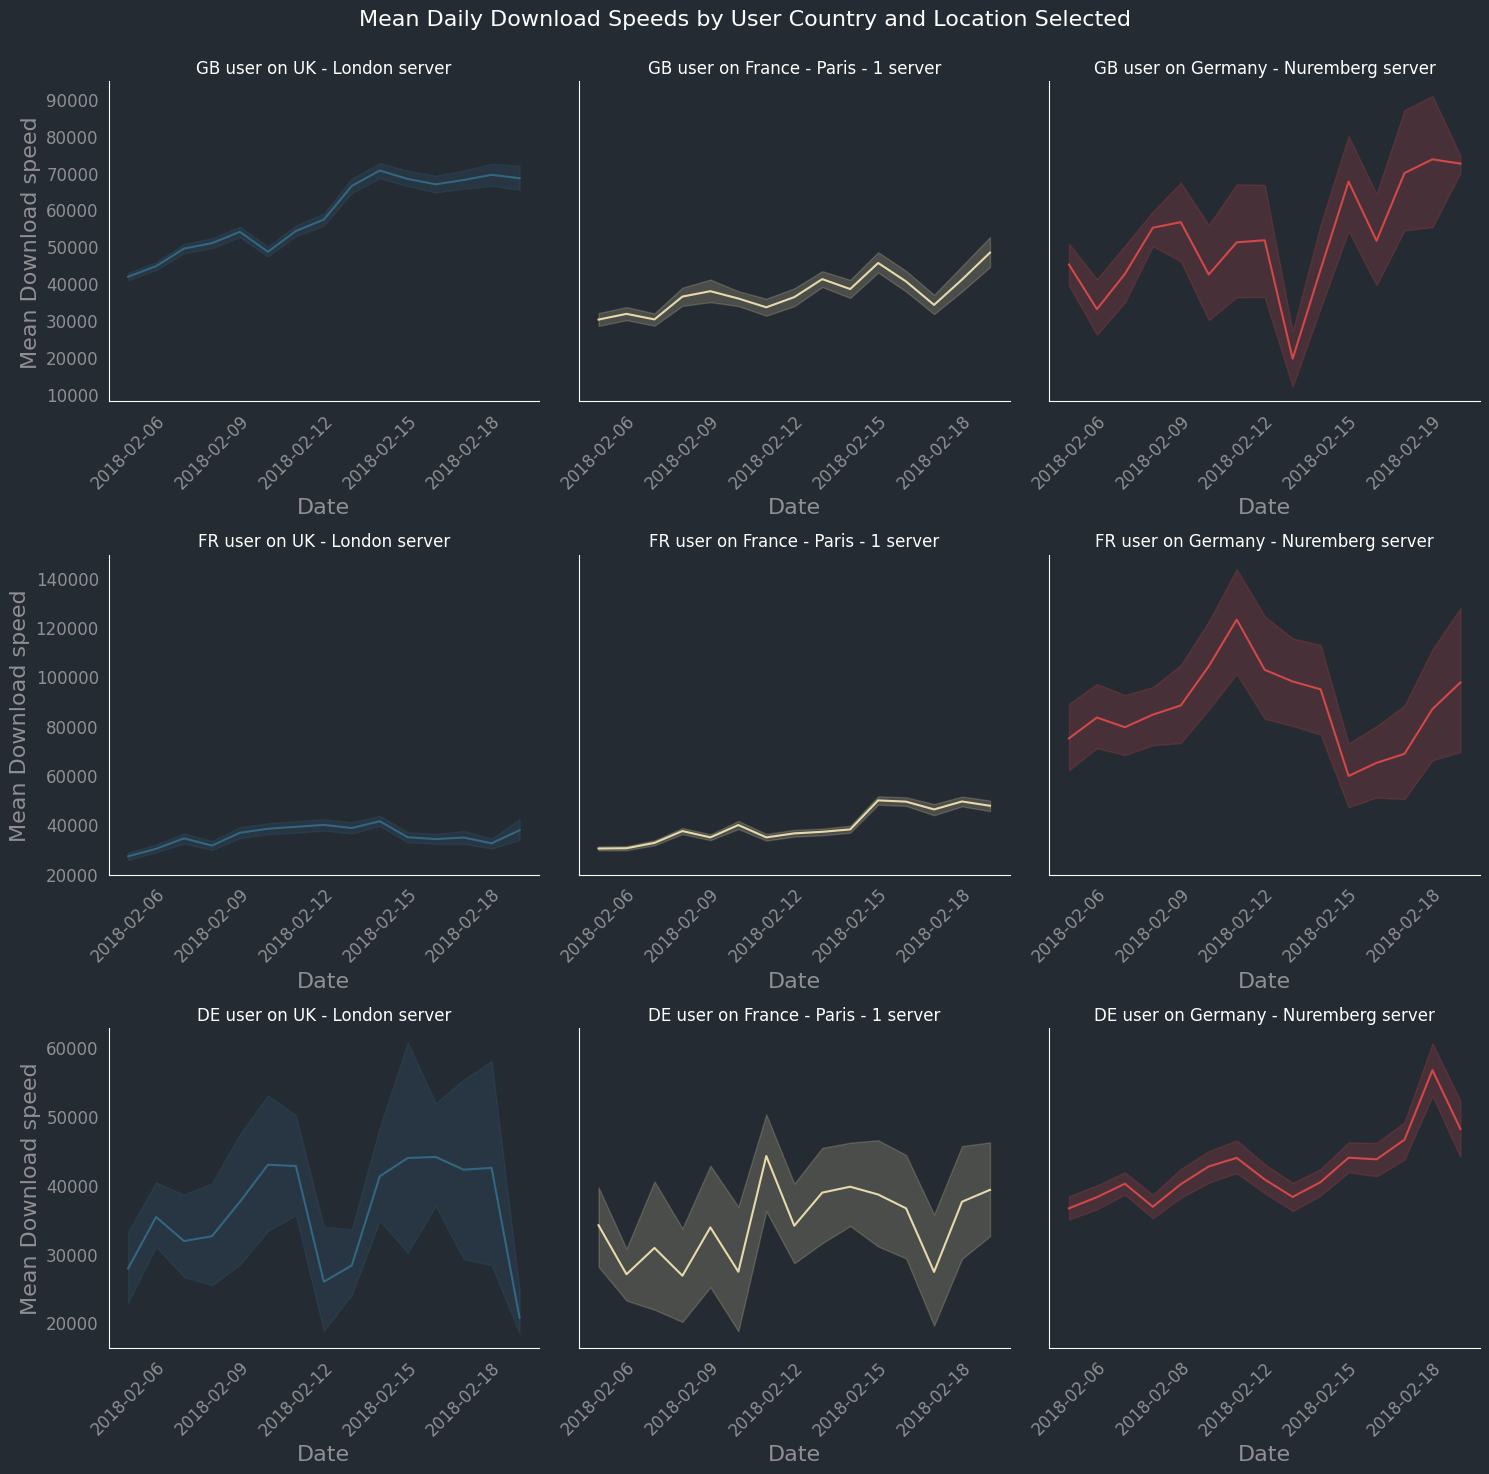

In [ ]:
# Create line plots for mean download speeds by user_country and location_selected
fig, axes = plt.subplots(3, 3, figsize=(15, 15), sharey='row')
plt.suptitle("Mean Daily Download Speeds by User Country and Location Selected", fontsize=16, color=palette["light"])

# Loop over combinations of countries and server locations
countries = df["user_country"].unique()
locations = df["location_selected"].unique()

for i, country in enumerate(countries, start=1):
    for j, location in enumerate(locations, start=1):
        ax = plt.subplot(3, 3, (i - 1) * 3 + j)
        mean_data = df[(df["user_country"] == country) & (df["location_selected"] == location)]
        title = f"{country} user on {location} server"
        create_line_plot(ax, mean_data, "date", "download_speed", "location_selected", mean_data["date"].unique()[::3], location_colours, legend=False, title=title)

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()


The plots above show that in general, users experience the best download speeds when using servers located in the country they are located in. The plots contain error bars (shaded areas) to show the level of confidence in these mean estimates, since the sample numbers differ widely.

For example, third plot of the second row indicates that users based in FR should connect to Germany - Nuremberg servers for faster download speeds; however, the sample size is small, so we would want to verify this through a large sample size. Otherwise, GB users should connect to the UK - London server, and DE users should connect to the Germany - Nuremberg server for the strongest performance.

The counts for each combination of user_country and location_selected are displayed below.

In [ ]:
counts = df.groupby(['user_country', 'location_selected']).size().reset_index(name='count')
counts

,user_country,location_selected,count
0,DE,France - Paris - 1,418
1,DE,Germany - Nuremberg,12068
2,DE,UK - London,434
3,FR,France - Paris - 1,36551
4,FR,Germany - Nuremberg,1386
5,FR,UK - London,10794
6,GB,France - Paris - 1,6053
7,GB,Germany - Nuremberg,342
8,GB,UK - London,31954


## Protocol analysis

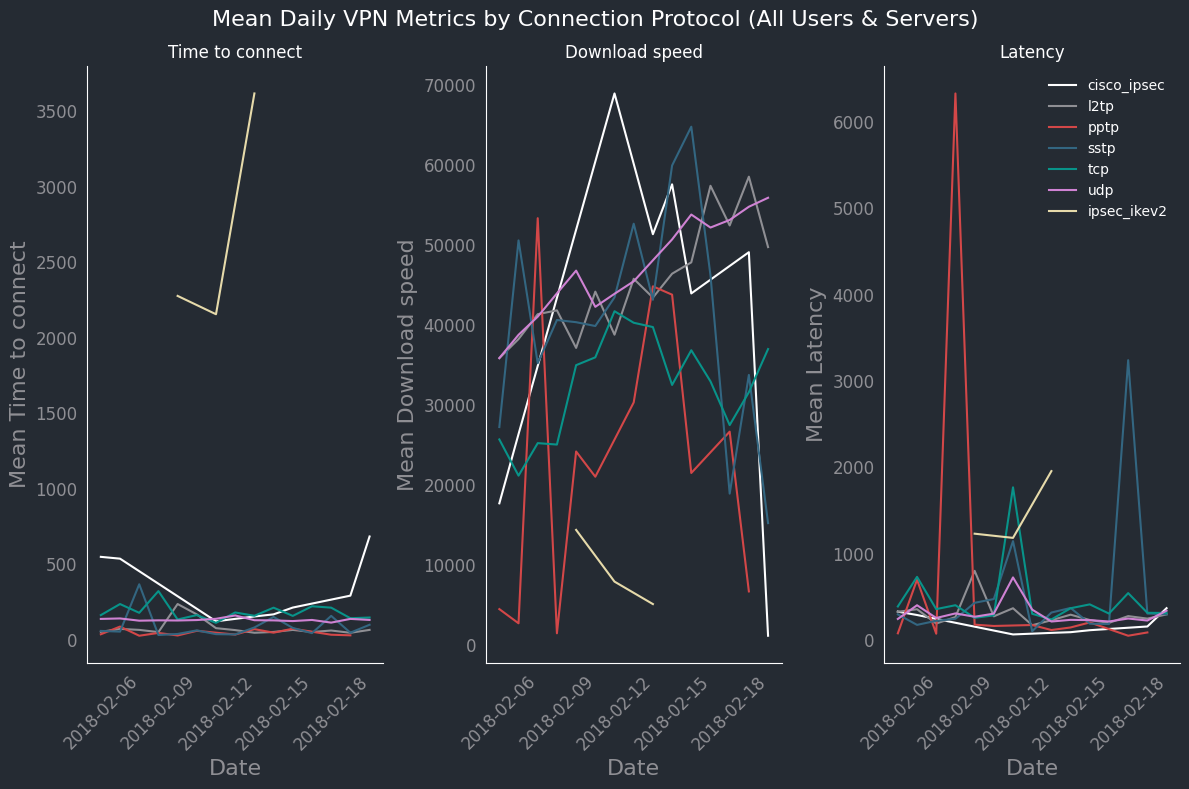

In [ ]:
# Create line plots for mean variables by connection protocol
plt.figure(figsize=(12, 8))
plt.suptitle("Mean Daily VPN Metrics by Connection Protocol (All Users & Servers)", fontsize=16, color=palette["light"])

# Line plot for time_to_connect
ax1 = plt.subplot(1, 3, 1)
mean_data = df.groupby(["date", "protocol"])["time_to_connect"].mean().reset_index()
create_line_plot(ax1, mean_data, "date", "time_to_connect", "protocol", mean_data["date"].unique()[::3], protocol_colours, legend=False)
# Line plot for download_speed
ax2 = plt.subplot(1, 3, 2)
mean_data = df.groupby(["date", "protocol"])["download_speed"].mean().reset_index()
create_line_plot(ax2, mean_data, "date", "download_speed", "protocol", mean_data["date"].unique()[::3], protocol_colours, legend=False)
# Line plot for latency
ax3 = plt.subplot(1, 3, 3)
mean_data = df.groupby(["date", "protocol"])['latency'].mean().reset_index()
create_line_plot(ax3, mean_data, "date", "latency", "protocol", mean_data["date"].unique()[::3], protocol_colours, legend=True)

plt.tight_layout()
plt.show()

An initial look at the performance of the seven connection protocols shows that IPsec IKEv2 underperforms across each of the metrics considered here. SSTP and PPTP underperform the other protocols due to volatility in terms of latency, and reduced or more volatile download speeds.

TCP and UDP are the two most common connection types; L2TP (Layer 2 Tunnel Protocol) and Cisco IPsec are useful for VPN performance, so we can further examine each of these four protocols below.

In [ ]:
# Get only Cisco IPsec, L2TP, TCP and UDP data
df_cisco = df[df["protocol"] == "cisco_ipsec"]
df_l2tp = df[df["protocol"] == "l2tp"]
df_tcp = df[df["protocol"] == "tcp"]
df_udp = df[df["protocol"] == "udp"]

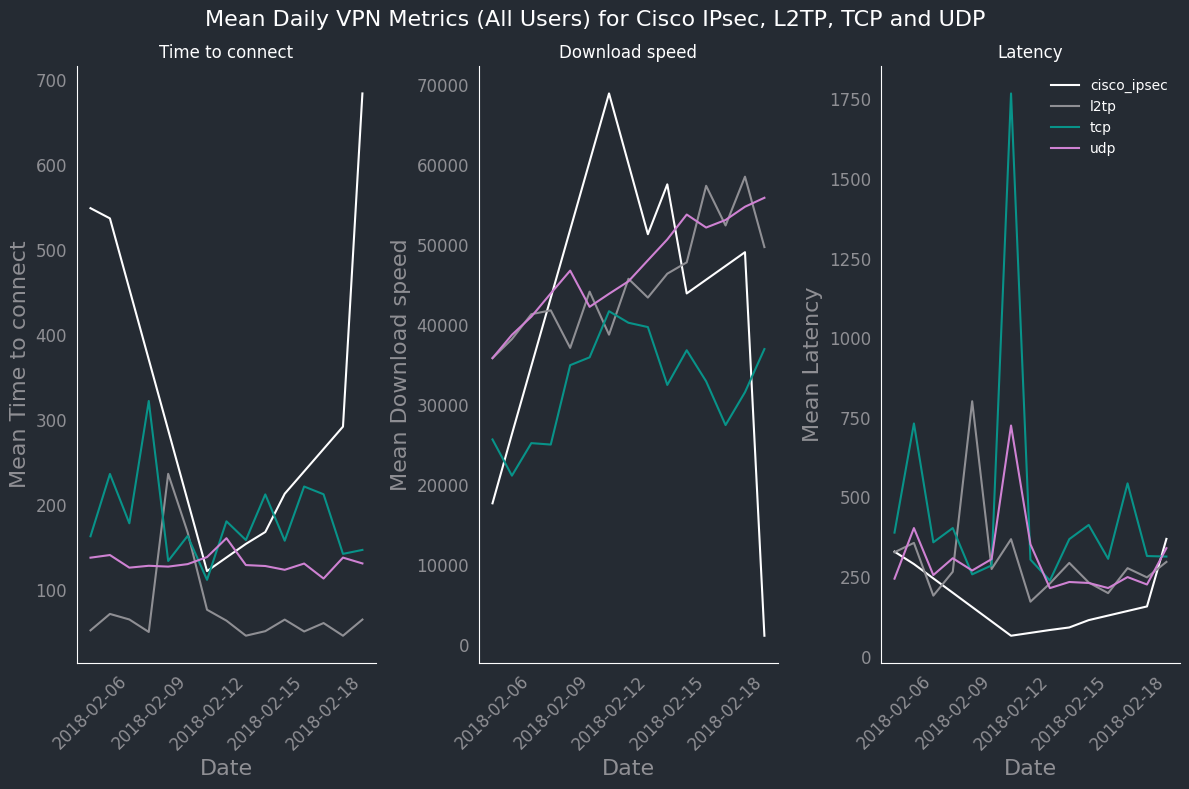

In [ ]:
# Create line plots for mean variables by connection protocol
plt.figure(figsize=(12, 8))
plt.suptitle("Mean Daily VPN Metrics (All Users) for Cisco IPsec, L2TP, TCP and UDP", fontsize=16, color=palette["light"])

# Line plot for time_to_connect
ax1 = plt.subplot(1, 3, 1)
mean_data = pd.concat([df_cisco, df_l2tp, df_tcp, df_udp]).groupby(["date", "protocol"])["time_to_connect"].mean().reset_index()
create_line_plot(ax1, mean_data, "date", "time_to_connect", "protocol", mean_data["date"].unique()[::3], protocol_colours, legend=False)
# Line plot for download_speed
ax2 = plt.subplot(1, 3, 2)
mean_data = pd.concat([df_cisco, df_l2tp, df_tcp, df_udp]).groupby(["date", "protocol"])["download_speed"].mean().reset_index()
create_line_plot(ax2, mean_data, "date", "download_speed", "protocol", mean_data["date"].unique()[::3], protocol_colours, legend=False)
# Line plot for latency
ax3 = plt.subplot(1, 3, 3)
mean_data = pd.concat([df_cisco, df_l2tp, df_tcp, df_udp]).groupby(["date", "protocol"])['latency'].mean().reset_index()
create_line_plot(ax3, mean_data, "date", "latency", "protocol", mean_data["date"].unique()[::3], protocol_colours, legend=True)

plt.tight_layout()
plt.show()

In [ ]:
# Get data descriptions for Cisco IPsec, L2TP, TCP and UDP
desc_cisco = df[df["protocol"] == "cisco_ipsec"].describe().T
desc_cisco = desc_cisco.loc[:, ["max", "mean", "std"]]
desc_l2tp = df[df["protocol"] == "l2tp"].describe().T
desc_l2tp = desc_l2tp.loc[:, ["max", "mean", "std"]]
desc_tcp = df[df["protocol"] == "tcp"].describe().T
desc_tcp = desc_tcp.loc[:, ["max", "mean", "std"]]
desc_udp = df[df["protocol"] == "udp"].describe().T
desc_udp = desc_udp.loc[:, ["max", "mean", "std"]]
# Combine descriptions and set higher-level column headings
combined_desc = pd.concat([desc_cisco, desc_l2tp, desc_tcp, desc_udp], keys=["Cisco IPsec", "L2TP", "TCP", "UDP"], axis=1).round(2)
print(combined_desc)

                Cisco IPsec                           L2TP            \
                        max      mean       std        max      mean   
time_to_connect       899.0    333.64    270.17    8371.00     81.55   
download_speed      69004.8  41909.29  23026.64  242342.84  44162.21   
latency               486.0    183.73    148.79   31806.00    315.71   

                                TCP                            UDP            \
                      std       max      mean       std        max      mean   
time_to_connect    400.52   16204.0    184.57    657.80   60113.00    132.68   
download_speed   32772.87  164740.4  32206.40  22861.58  372800.32  45719.41   
latency           1324.34  978256.0    487.45  10653.16  391519.00    305.97   

                           
                      std  
time_to_connect    705.19  
download_speed   39143.81  
latency           3145.61  


UDP (User Datagram Protocol) and TCP (Transmission Control Protocol) are transport layer protocols. Traditionally, TCP is regarded as more reliable than UDP, while UDP offers faster download speeds.

However, for the time period examined here, UDP consistently outperformed the TCP protocols on each of connection time, download speed, and latency. We may wish to observe the data over a longer time period; should they persist over a longer duration, we may want to consider UDP over TCP as our default transport layer protocol.

Cisco IPsec and L2TP are used for VPN connections, typically in conjunction with other protocols (such as UDP and TCP).

Both have their advantages; within our sample, Cisco IPsec was slower to connect, but offered lower latency (as well as faster, but more volatile download speeds). L2TP was more consistent in providing reliable performance, but had higher latency than Cisco IPsec. Cisco IPsec may therefore be more suited to situations that require high frame rates, such as gaming servers and video calls; L2TP may better suit typical day-to-day usage.

## Recommendations

#### Continue monitoring

1. Monitor over a longer time period and on an ongoing basis, to verify whether the patterns observed here are consistent over time. This is low-cost to implement, and will ensure that our resources can be allocated as needed at given intervals.

#### Server selection: UK - London

2. The UK - London server offers the fastest and most reliable connections in aggregate, though in general users experience the best connections via servers for the country they are located in. The Germany - Nuremberg server should be utilised as the fallback server; although it has the worst connection times of the three, it provides consistently faster download speeds and lower latency than the France - Paris - 1 server.

#### Protocol selection: UDP with L2TP

3. In terms of transport layer protocols, UDP offered consistently better performance across the sample period than TCP. For secure VPN connections, L2TP provided more reliable results than Cisco IPsec. However, the latter may provide faster download speeds and lower latency, so for high-performance situations such as video calls, Cisco IPsec may be the preferred protocol.